If first order exponential smoothing does not perform well, then there is a trend in the time series data

In [2]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar_time_series import time_series

%reload_ext autoreload

# load Data

In [4]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv(r'E:\gitlab\dataset\time_series\quarterly-beer-production-in-aus-March 1956-June 1994.csv')

In [5]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

Shape of the dataframe: (155, 2)


,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [6]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'},inplace=True)

In [7]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


# function for double exponential smoothing

In [8]:
# Function for Sigle exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

In [10]:
beer_df['DEF'] = time_series.exp_smoothing(beer_df,'Beer_Prod',alpha=0.4,beta=0.7,types='double')

In [13]:
beer_df['DEF_single'] = time_series.exp_smoothing(beer_df,'Beer_Prod',alpha=0.4,beta=0.7,types='single')

<IPython.core.display.Javascript object>


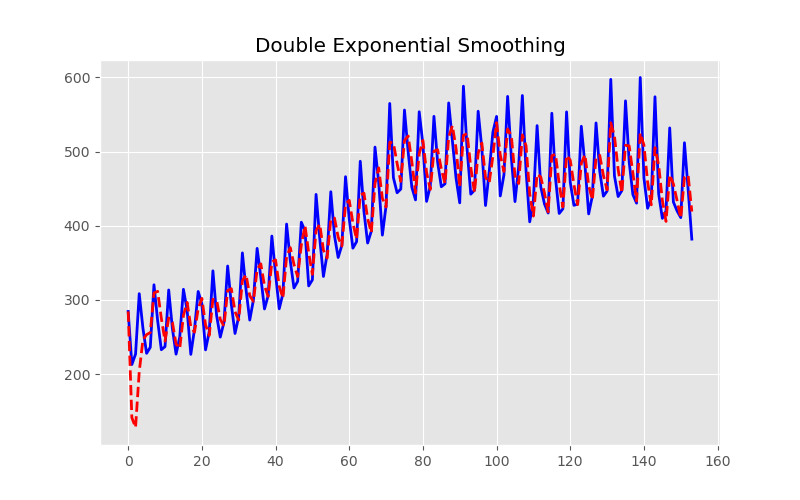

In [14]:
res = time_series.exp_smoothing(beer_df,'Beer_Prod',alpha=0.4,beta=0.7,types='double',is_plot=True)

<IPython.core.display.Javascript object>


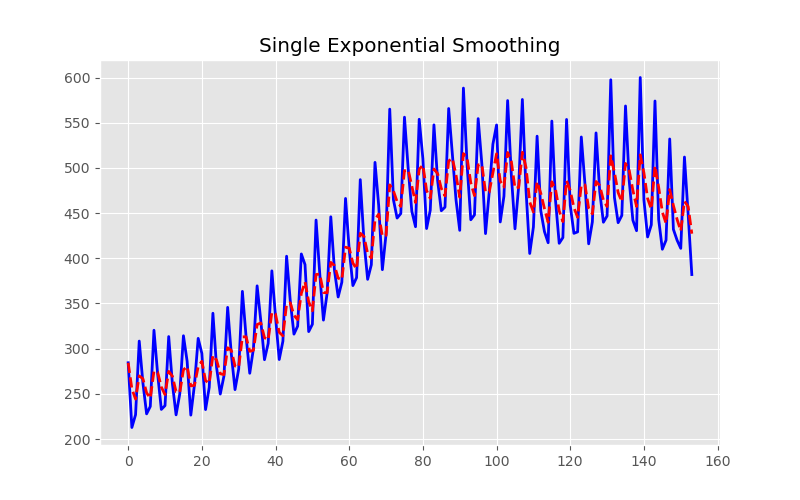

In [15]:
res = time_series.exp_smoothing(beer_df,'Beer_Prod',alpha=0.4,beta=0.7,types='single',is_plot=True)